# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn import preprocessing
import datetime

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [3]:
%matplotlib inline

In [4]:
df=pd.read_csv('googleplaystore.csv')

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [7]:
df['Category'].nunique()

34

# NOTE:- Deleting a bad column, we can see in category column contains 1.9 strange category value. 
It's obvious that the first value of this record is missing (App name) and 
all other values are respectively propagated backward starting from "Category" towards the "Current Ver"; and
the last column which is "Android Ver" is left null. 
It's better to drop the entire recored instead of consider these unreasonable values while cleaning each column!

In [8]:
i=df[df['Category']=='1.9'].index

In [9]:
df.iloc[i]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
df=df.drop(i)

In [11]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [12]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [13]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

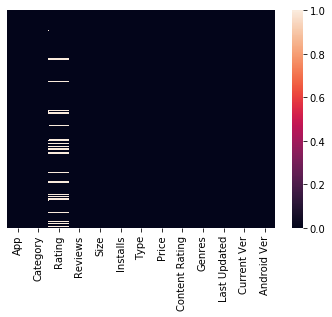

In [14]:
sns.heatmap(df.isnull(),yticklabels=False)

# NOTE:- Imputing null values of Rating Column of dataframe.
       

In [15]:
# The best way to fill missing values might be using the median instead of mean.
df['Rating']=df['Rating'].fillna(df['Rating'].median())

In [16]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [17]:
df['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [18]:
df=df.dropna(axis=0)

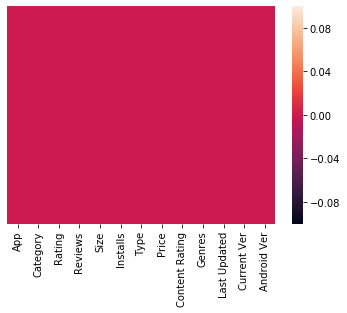

In [19]:
sns.heatmap(df.isnull(),yticklabels=False)

In [20]:
df.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [21]:
df['Current Ver']

0                     1.0.0
1                     2.0.0
2                     1.2.4
3        Varies with device
4                       1.1
                ...        
10836                  1.48
10837                   1.0
10838                   1.0
10839    Varies with device
10840    Varies with device
Name: Current Ver, Length: 10829, dtype: object

In [22]:
# Before filling null values we have to clean all non numerical values & unicode characters 
replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
    df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))
    
regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
    df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))
    
df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)

df['Current Ver']=df['Current Ver'].fillna(df['Current Ver'].median())

In [23]:
df['Current Ver']

0        1.00
1        2.00
2        1.24
3        0.00
4        1.10
         ... 
10836    1.48
10837    1.00
10838    1.00
10839    0.00
10840    0.00
Name: Current Ver, Length: 10829, dtype: float64

In [24]:
df['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10829, dtype: object

In [25]:
df=df[pd.notnull(df['Last Updated'])]
df=df[pd.notnull(df['Content Rating'])]

In [26]:
df['Rating'].describe()

count    10829.000000
mean         4.206510
std          0.480467
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

Text(0, 0.5, 'Counts')

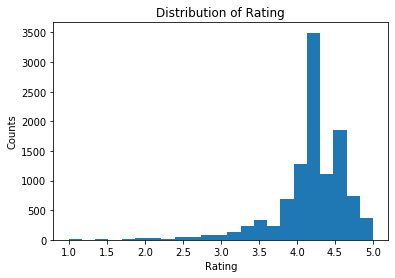

In [27]:
df['Rating'].plot(kind='hist',bins=23)
plt.title('Distribution of {}'.format('Rating'))
plt.xlabel('Rating')
plt.ylabel("Counts")


In [28]:
df_rating=pd.DataFrame(data=df,columns=['Rating', 'Type', 'Category'])
df_rating

,Rating,Type,Category
0,4.1,Free,ART_AND_DESIGN
1,3.9,Free,ART_AND_DESIGN
2,4.7,Free,ART_AND_DESIGN
3,4.5,Free,ART_AND_DESIGN
4,4.3,Free,ART_AND_DESIGN
...,...,...,...
10836,4.5,Free,FAMILY
10837,5.0,Free,FAMILY
10838,4.3,Free,MEDICAL
10839,4.5,Free,BOOKS_AND_REFERENCE


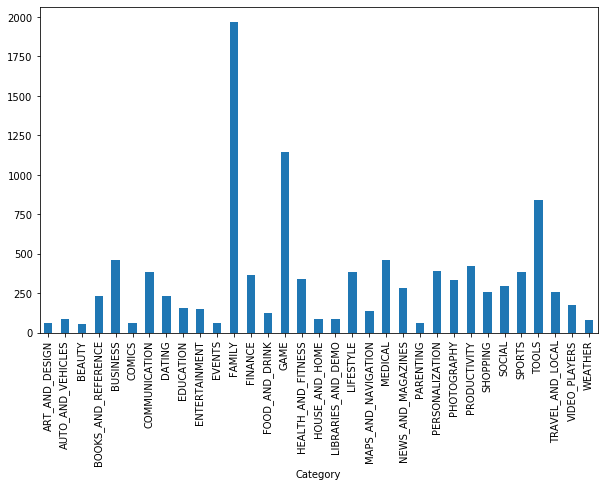

In [29]:
df_rating.groupby('Category')['Rating'].count().plot(kind='bar',figsize=(10,6))

## How do the app ratings differ between paid and free apps in general?

In [30]:
df_rating_cat=df_rating.groupby(['Category','Type'])['Rating'].mean().unstack()
df_rating_cat

Type,Free,Paid
Category,,
ART_AND_DESIGN,4.355738,4.733333
AUTO_AND_VEHICLES,4.198780,4.400000
BEAUTY,4.283019,NaN
BOOKS_AND_REFERENCE,4.341584,4.292857
BUSINESS,4.181166,4.221429
COMICS,4.160000,NaN
COMMUNICATION,4.185556,4.107407
DATING,4.029075,3.914286
EDUCATION,4.378947,4.750000


### Conclusion: Paid app is not available on BEAUTY,COMICS and HOUSE_AND_HOME category.

Text(0, 0.5, 'Rating')

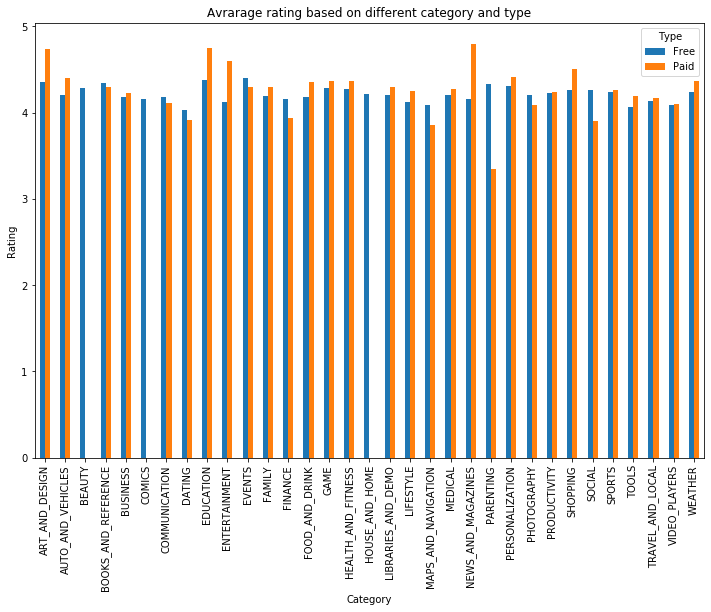

In [31]:
df_rating_cat.plot(kind='bar',figsize=(12,8))
plt.title("Avrarage rating based on different category and type")
plt.ylabel("Rating")

##  How does the ratings differ in general?

Text(0, 0.5, 'Rating')

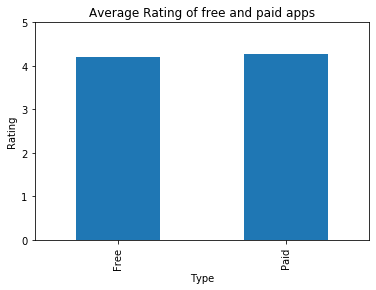

In [32]:
df_rating.groupby('Type')['Rating'].mean().plot(kind='bar')
plt.title("Average Rating of free and paid apps")
plt.ylim(0,5)
plt.ylabel("Rating")


In [33]:
df_rating.groupby('Type')['Rating'].mean()

Type
Free    4.201216
Paid    4.273149
Name: Rating, dtype: float64

In [34]:
df['Rating'].mean()

4.206510296426401

### Conclusion: The average Rating of Free Apps is 4.20 and average Rating of Paid Apps  is 4.27                               Note that the average rating for all apps is 4.20,                                                                                                                So, Free apps are rated same as average, while Paid apps are rated little higher than the average score.

In [35]:
# App values encoding
le = preprocessing.LabelEncoder()
df['App'] = le.fit_transform(df['App'])
# This encoder converts the values into numeric values

In [36]:
df['App']

0        6955
1        2630
2        8648
3        7819
4        7014
         ... 
10836    8165
10837    4605
10838    6884
10839    8386
10840    9475
Name: App, Length: 10829, dtype: int64

In [37]:
# Category features encoding
category_list=df['Category'].unique().tolist()
category_list = ['cat_' + word for word in category_list]
df = pd.concat([df, pd.get_dummies(df['Category'], prefix='cat')], axis=1)

In [38]:
# Genres feature encoding
le= preprocessing.LabelEncoder()
df['Genres']=le.fit_transform(df['Genres'])

In [39]:
df['Genres']

0         9
1        12
2         9
3         9
4        11
         ..
10836    39
10837    39
10838    71
10839    19
10840    67
Name: Genres, Length: 10829, dtype: int64

In [40]:
# Encoding Content Rating feature
le=preprocessing.LabelEncoder()
df['Content Rating']=le.fit_transform(df['Content Rating'])

In [41]:
df['Content Rating']

0        1
1        1
2        1
3        4
4        1
        ..
10836    1
10837    1
10838    1
10839    3
10840    1
Name: Content Rating, Length: 10829, dtype: int64

In [42]:
# Price cleaning ---> removing $ from price column
df['Price']=df['Price'].apply(lambda x: x.strip('$'))

# Installs Cleaning ----> removing + from installs column
df['Installs']=df['Installs'].apply(lambda x: x.strip('+').replace(",",""))

# Last Updated encoding 
df['Last Updated']=pd.to_datetime(df['Last Updated'])

In [43]:
# Convert kbytes to Mbytes 
k_indices = df['Size'].loc[df['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(df.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).
                        apply(lambda x: round(x,3)).astype(str))
df.loc[k_indices,'Size']=converter

#Removing M from Size column
df['Size']= df['Size'].apply(lambda x: x.strip('M'))


df[df['Size']=='Varies with device'] = 0
df['Size']=df['Size'].astype(float)

In [44]:
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     0.0
10840    19.0
Name: Size, Length: 10829, dtype: float64

In [45]:
# Type encoding
df['Type']=pd.get_dummies(df['Type'])



In [46]:
df['Size'].dtype

dtype('float64')

In [47]:
df.head() #After Cleaning columns

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,6955,ART_AND_DESIGN,4.1,159,19.0,10000,0,0,1,9,...,0,0,0,0,0,0,0,0,0,0
1,2630,ART_AND_DESIGN,3.9,967,14.0,500000,0,0,1,12,...,0,0,0,0,0,0,0,0,0,0
2,8648,ART_AND_DESIGN,4.7,87510,8.7,5000000,0,0,1,9,...,0,0,0,0,0,0,0,0,0,0
3,7819,ART_AND_DESIGN,4.5,215644,25.0,50000000,0,0,4,9,...,0,0,0,0,0,0,0,0,0,0
4,7014,ART_AND_DESIGN,4.3,967,2.8,100000,0,0,1,11,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 46 columns):
App                        10829 non-null int64
Category                   10829 non-null object
Rating                     10829 non-null float64
Reviews                    10829 non-null object
Size                       10829 non-null float64
Installs                   10829 non-null object
Type                       10829 non-null uint8
Price                      10829 non-null object
Content Rating             10829 non-null int64
Genres                     10829 non-null int64
Last Updated               10829 non-null object
Current Ver                10829 non-null float64
Android Ver                10829 non-null object
cat_ART_AND_DESIGN         10829 non-null int64
cat_AUTO_AND_VEHICLES      10829 non-null int64
cat_BEAUTY                 10829 non-null int64
cat_BOOKS_AND_REFERENCE    10829 non-null int64
cat_BUSINESS               10829 non-null int64
cat_COMICS     

In [49]:
pd.set_option('display.max_columns',None)

In [50]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'cat_ART_AND_DESIGN', 'cat_AUTO_AND_VEHICLES',
       'cat_BEAUTY', 'cat_BOOKS_AND_REFERENCE', 'cat_BUSINESS', 'cat_COMICS',
       'cat_COMMUNICATION', 'cat_DATING', 'cat_EDUCATION', 'cat_ENTERTAINMENT',
       'cat_EVENTS', 'cat_FAMILY', 'cat_FINANCE', 'cat_FOOD_AND_DRINK',
       'cat_GAME', 'cat_HEALTH_AND_FITNESS', 'cat_HOUSE_AND_HOME',
       'cat_LIBRARIES_AND_DEMO', 'cat_LIFESTYLE', 'cat_MAPS_AND_NAVIGATION',
       'cat_MEDICAL', 'cat_NEWS_AND_MAGAZINES', 'cat_PARENTING',
       'cat_PERSONALIZATION', 'cat_PHOTOGRAPHY', 'cat_PRODUCTIVITY',
       'cat_SHOPPING', 'cat_SOCIAL', 'cat_SPORTS', 'cat_TOOLS',
       'cat_TRAVEL_AND_LOCAL', 'cat_VIDEO_PLAYERS', 'cat_WEATHER'],
      dtype='object')

In [51]:
features = ['App', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Current Ver'
           ,'cat_ART_AND_DESIGN', 'cat_AUTO_AND_VEHICLES',
       'cat_BEAUTY', 'cat_BOOKS_AND_REFERENCE', 'cat_BUSINESS', 'cat_COMICS',
       'cat_COMMUNICATION', 'cat_DATING', 'cat_EDUCATION', 'cat_ENTERTAINMENT',
       'cat_EVENTS', 'cat_FAMILY', 'cat_FINANCE', 'cat_FOOD_AND_DRINK',
       'cat_GAME', 'cat_HEALTH_AND_FITNESS', 'cat_HOUSE_AND_HOME',
       'cat_LIBRARIES_AND_DEMO', 'cat_LIFESTYLE', 'cat_MAPS_AND_NAVIGATION',
       'cat_MEDICAL', 'cat_NEWS_AND_MAGAZINES', 'cat_PARENTING',
       'cat_PERSONALIZATION', 'cat_PHOTOGRAPHY', 'cat_PRODUCTIVITY',
       'cat_SHOPPING', 'cat_SOCIAL', 'cat_SPORTS', 'cat_TOOLS',
       'cat_TRAVEL_AND_LOCAL', 'cat_VIDEO_PLAYERS', 'cat_WEATHER']
X = df[features]


In [52]:
y = df['Rating']

In [53]:
X.dtypes

App                          int64
Reviews                     object
Size                       float64
Installs                    object
Type                         uint8
Price                       object
Content Rating               int64
Genres                       int64
Current Ver                float64
cat_ART_AND_DESIGN           int64
cat_AUTO_AND_VEHICLES        int64
cat_BEAUTY                   int64
cat_BOOKS_AND_REFERENCE      int64
cat_BUSINESS                 int64
cat_COMICS                   int64
cat_COMMUNICATION            int64
cat_DATING                   int64
cat_EDUCATION                int64
cat_ENTERTAINMENT            int64
cat_EVENTS                   int64
cat_FAMILY                   int64
cat_FINANCE                  int64
cat_FOOD_AND_DRINK           int64
cat_GAME                     int64
cat_HEALTH_AND_FITNESS       int64
cat_HOUSE_AND_HOME           int64
cat_LIBRARIES_AND_DEMO       int64
cat_LIFESTYLE                int64
cat_MAPS_AND_NAVIGAT

# Training a data

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Decision Tree Model Evaluation

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
tree=DecisionTreeRegressor()

In [58]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [59]:
pred=tree.predict(X_test)

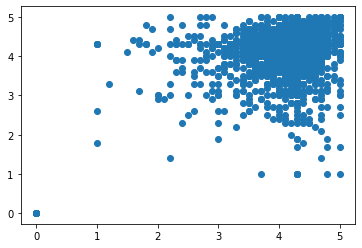

In [60]:
plt.scatter(y_test,pred)

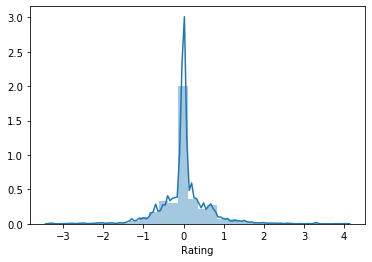

In [61]:
sns.distplot((y_test-pred),bins=30)

In [62]:
from sklearn import metrics

In [63]:
print("MSE:",metrics.mean_squared_error(y_test,pred))
print("MAE:",metrics.mean_absolute_error(y_test,pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred)))

MSE: 0.3634903047091413
MAE: 0.34779932286857573
RMSE: 0.6029015713274773


# Model Performance

In [64]:
# Calculate the mean accuracy of the Decision Tree model
accuracy = tree.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'


'Accuracy: 85.06%'

# Random Forest Model Evaluation

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
rfr=RandomForestRegressor(n_estimators=300)

In [89]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [90]:
prediction=rfr.predict(X_test)

In [91]:
print("MSE:",metrics.mean_squared_error(y_test,prediction))
print("MAE:",metrics.mean_absolute_error(y_test,prediction))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MSE: 0.19181518597175223
MAE: 0.26061547142710667
RMSE: 0.43796710603851546


# Model Performance

In [92]:
#calculating Accuaracy of Random Forest model
accuracy = rfr.score(X_test,y_test)
print('Accuracy is:',str(np.round(accuracy* 100, 2)),"%")

Accuracy is: 92.12 %


Evaluating a K-Fold cross validation

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
Accuracy= cross_val_score(estimator=RandomForestRegressor(n_estimators=300),n_jobs=-1,
    verbose=1,cv=10,X=X_train,y=y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   51.0s finished


In [95]:
Accuracy

array([0.92349225, 0.93500486, 0.91973656, 0.9273379 , 0.94640788,
       0.92825109, 0.92113116, 0.92759886, 0.93020651, 0.92948664])

In [96]:
Accuracy.mean()

0.9288653716994402

In [97]:
Accuracy.std()

0.007238477279385695

# Conclusion

### With the help of Decision Tree it obtain Accuaracy of 85.06% and Using K-fold cross valiation on Random forest it obtain mean Accuaracy of  92.89 %